In [2]:
# ==============================
# 1) Import Libraries
# ==============================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (10,6)
sns.set_palette("icefire")

In [3]:
df=pd.read_csv(r"C:\Users\ZBooK\Downloads\Telegram Desktop\diabetes.csv")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [9]:
# 3) Data Cleaning

df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [10]:
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

C:\Users\ZBooK\AppData\Local\Temp\ipykernel_12284\2982786776.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [11]:
X = df.drop('Outcome', axis=1)  
y = df['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()         
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test) 

# *Exploring the data*

In [13]:
#  Display the first rows in the data (by default 5)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [14]:
# Shape of the data (number of rows and columns)
df.shape

(768, 9)

In [15]:
# Basic information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


In [16]:
# Statistical information about the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# *missing values*

In [17]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# *Outliers*

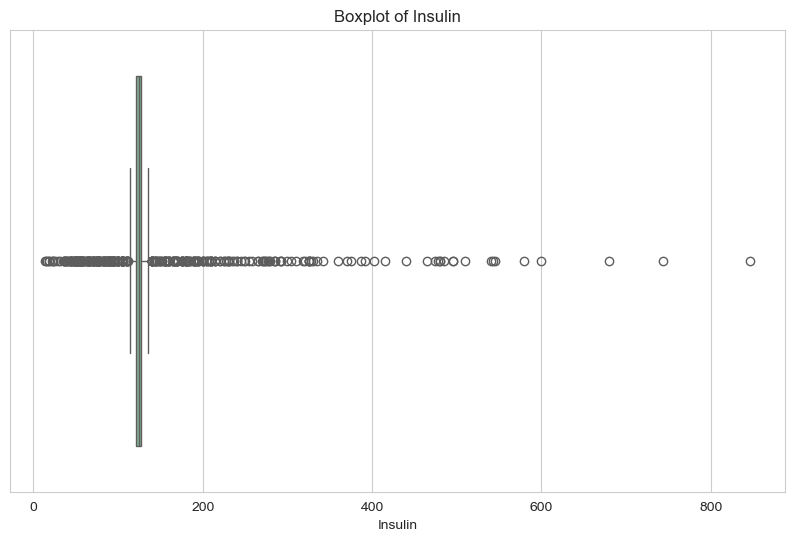

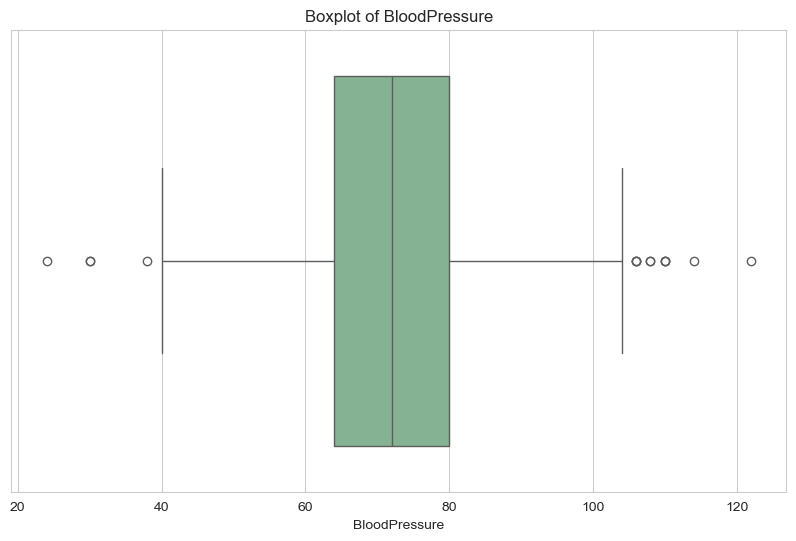

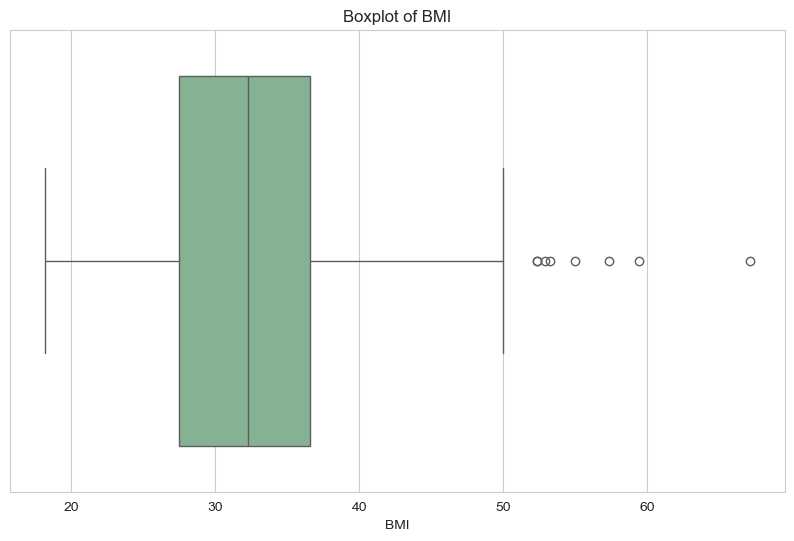

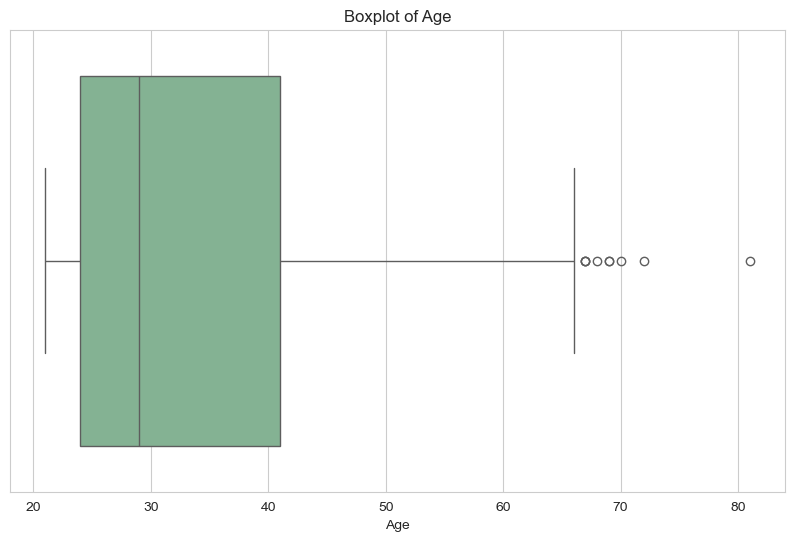

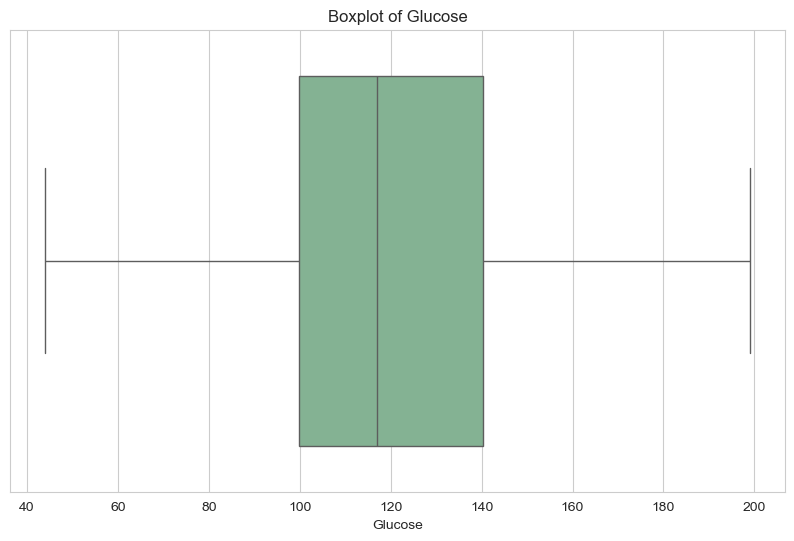

In [18]:
cols_to_plot = ['Insulin', 'BloodPressure', 'BMI', 'Age', 'Glucose']
for col in cols_to_plot:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

*Insulin → فيه Outliers كتير يمين

Glucose → توزيع متوازن

BMI → تباين متوسط

Age → طبيعي

BloodPressure → طبيعي*

In [19]:
# 4) Handle Outliers (Insulin)

Q1 = df['Insulin'].quantile(0.25)
Q3 = df['Insulin'].quantile(0.75)
IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df['Insulin'] = df['Insulin'].clip(lower, upper)


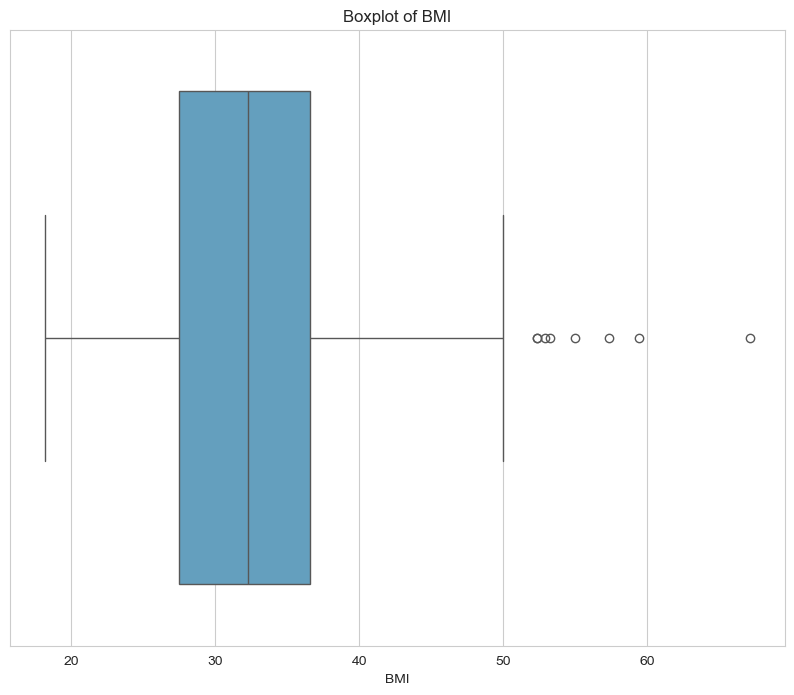

In [78]:
sns.boxplot(x=df[col])
plt.title(f'Boxplot of {col}')
plt.show()

In [21]:
#Outcome balance
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

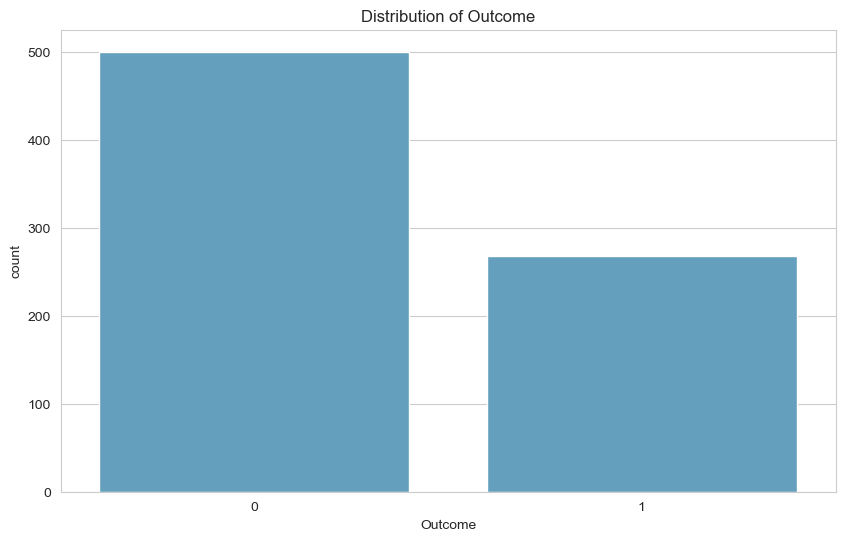

In [46]:
sns.countplot(x='Outcome', data=df)
plt.title("Distribution of Outcome")
plt.show()

*البيانات تحتوي علي عدم توازن بين المصابين وغير المصابين*

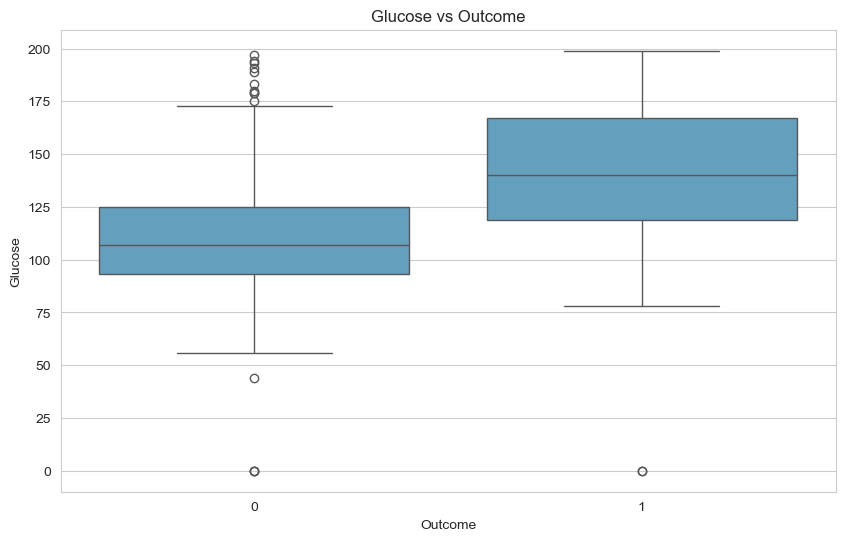

In [47]:
# Feature مع Outcome
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title("Glucose vs Outcome")
plt.show()

*المرضى لديهم مستوى جلوكوز أعلى من غير المصابين*

# Data Visualization

In [58]:
# Uniform palette
sns.set_palette("icefire")
plt.rcParams["figure.figsize"] = (10,8)

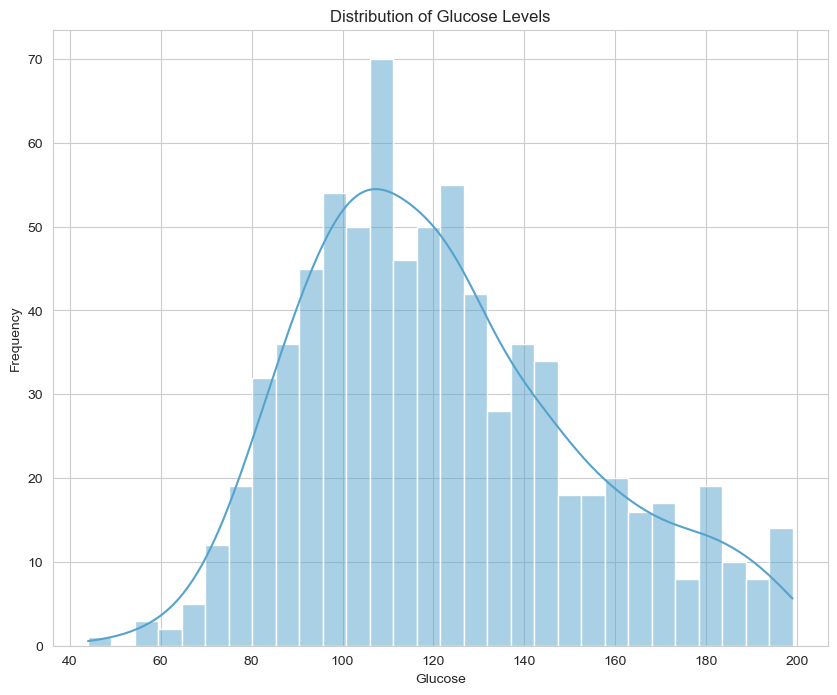

In [84]:
# 5) EDA with Questions & Insights
# Glucose Histogram
sns.histplot(df["Glucose"], bins=30,kde=True)
plt.title("Distribution of Glucose Levels")
plt.xlabel("Glucose")
plt.ylabel("Frequency")
plt.show()

#### Glucose levels are generally higher among diabetic patients, indicating it is a strong predictor of the condition.

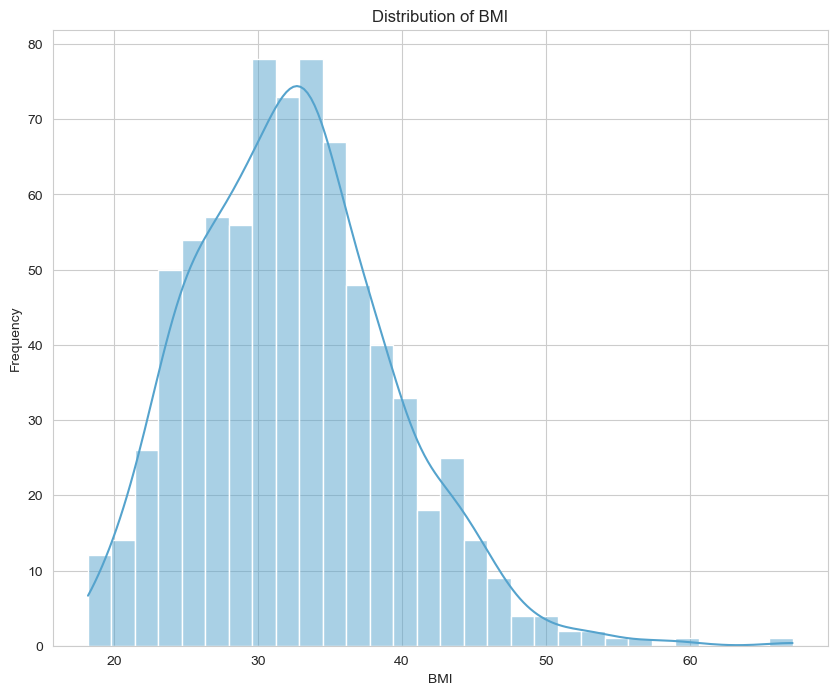

In [85]:
# BMI Histogram
sns.histplot(df["BMI"], bins=30, kde=True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

#### BMI shows moderate variation, with higher values more frequently associated with diabetic cases.

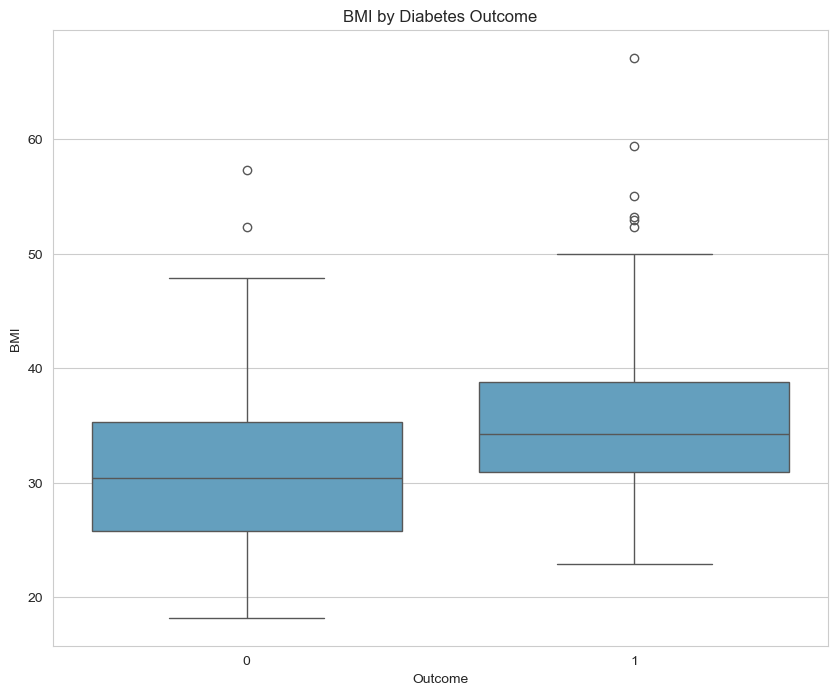

In [86]:
#BMI Boxplot
sns.boxplot(x="Outcome", y="BMI", data=df)
plt.title("BMI by Diabetes Outcome")
plt.show()

#### The boxplot shows that diabetic patients generally have a higher median BMI compared to non-diabetic patients.

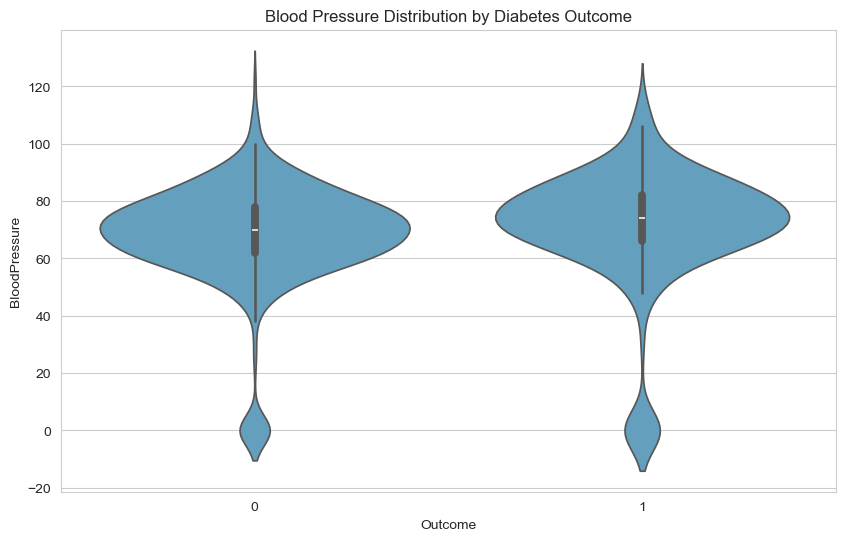

In [5]:
#Violin Plot (BMI by Outcome)
sns.violinplot(x="Outcome", y="BloodPressure", data=df)
plt.title("Blood Pressure Distribution by Diabetes Outcome")
plt.show()

#### Blood pressure distributions are similar for diabetic and non-diabetic individuals, showing no strong difference.

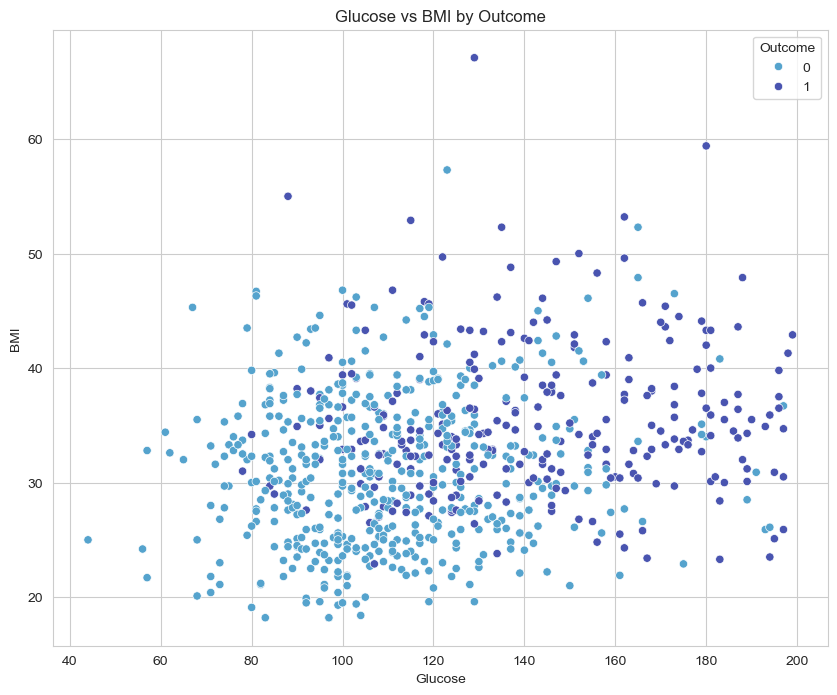

In [87]:
#Scatter Plot (Glucose vs BMI with hue)
sns.scatterplot(x="Glucose", y="BMI", hue="Outcome", data=df)
plt.title("Glucose vs BMI by Outcome")
plt.show()

#### Patients with both high glucose and high BMI are more likely to be classified as diabetic.

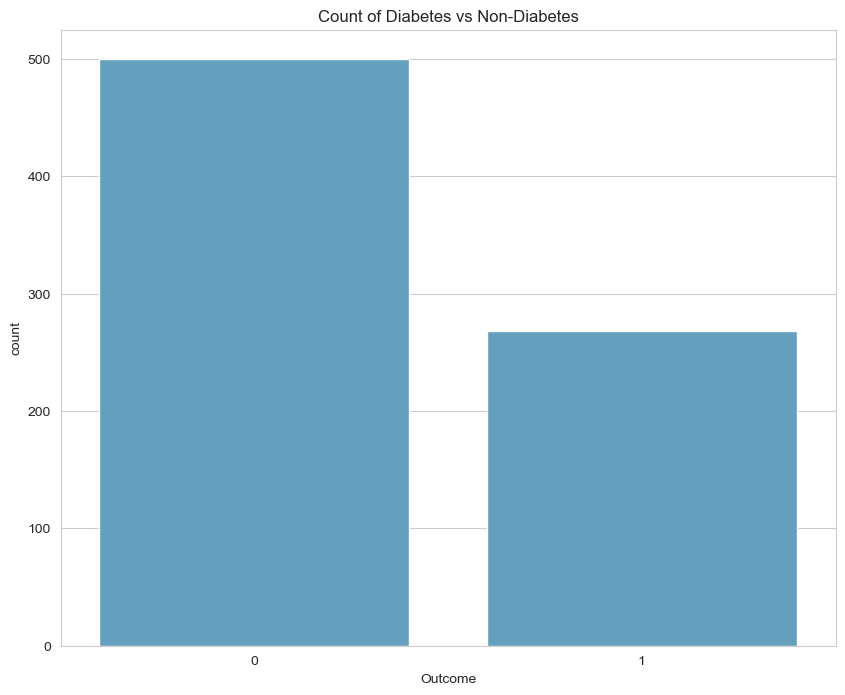

In [63]:
#Countplot (Outcome)
sns.countplot(x="Outcome", data=df)
plt.title("Count of Diabetes vs Non-Diabetes")
plt.show()

#### Non-diabetic cases slightly outnumber diabetic cases in the dataset.

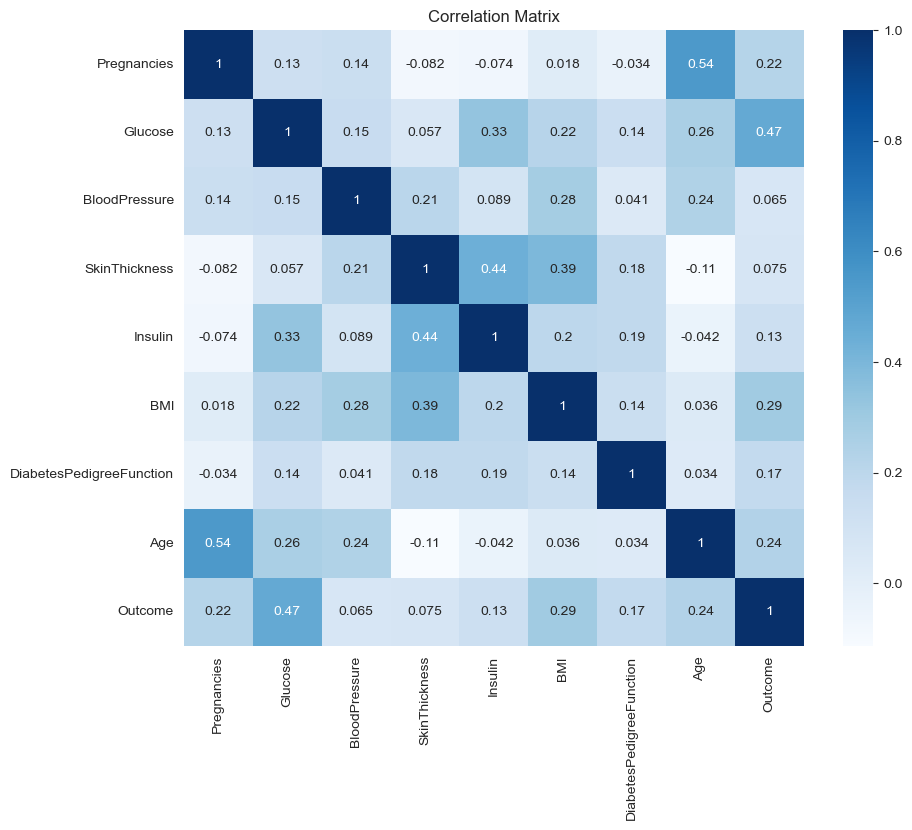

In [65]:
#Correlation Heatmap
plt.figure()
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

#### Glucose has the strongest positive correlation with diabetes outcome compared to other features.

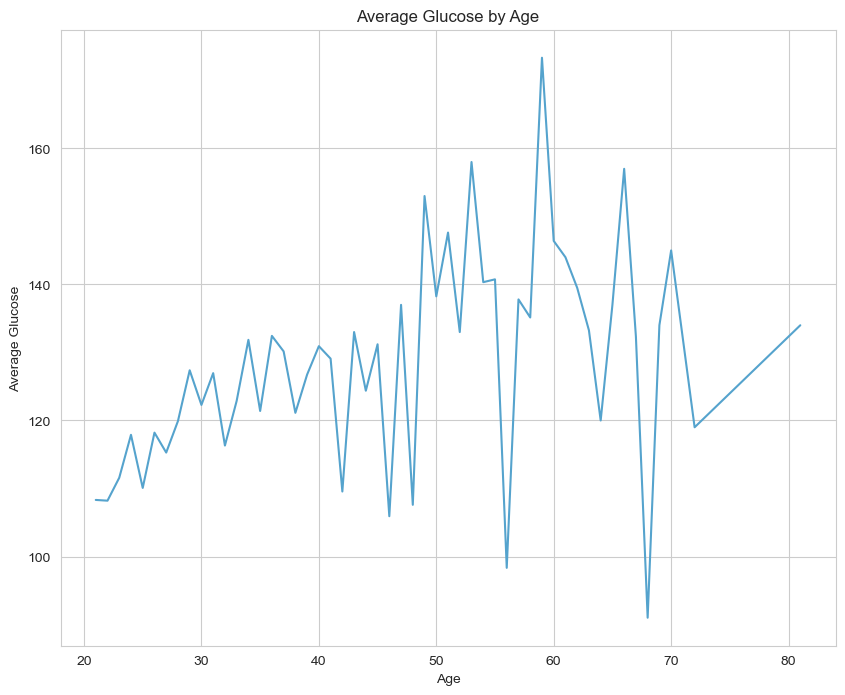

In [66]:
#Line Plot (Age vs Avg Glucose)
age_glucose = df.groupby("Age")["Glucose"].mean()
plt.plot(age_glucose)
plt.title("Average Glucose by Age")
plt.xlabel("Age")
plt.ylabel("Average Glucose")
plt.show()

#### Average glucose levels tend to increase with age, which may contribute to higher diabetes risk.

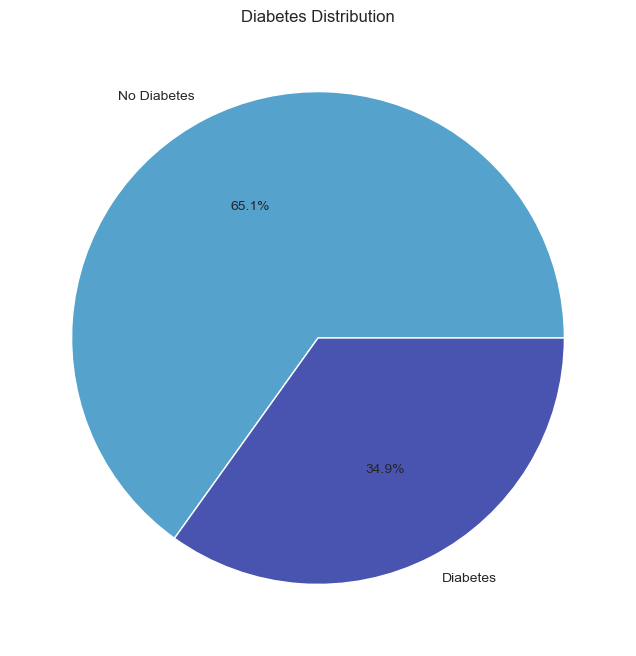

In [67]:
# Pie Chart (Outcome Distribution)
# Count values
counts = df["Outcome"].value_counts()

# Labels
labels = ["No Diabetes", "Diabetes"]

plt.figure()
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
)

plt.title("Diabetes Distribution")
plt.show()

#### The dataset shows a higher proportion of non-diabetic patients.

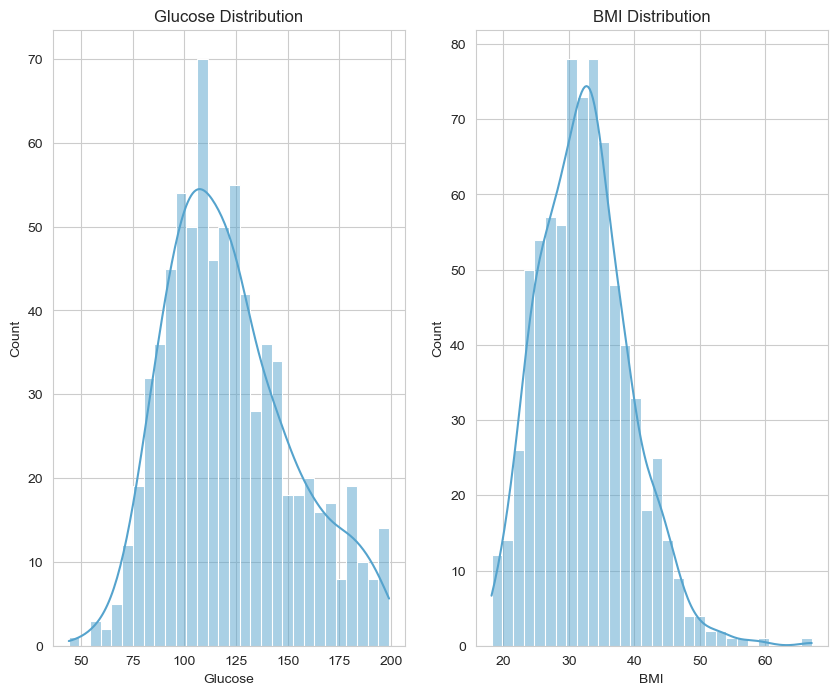

In [91]:
#Subplot (Glucose & BMI Distribution Combined)
fig, axes = plt.subplots(1, 2)

sns.histplot(df["Glucose"], bins=30, kde=True, ax=axes[0])
axes[0].set_title("Glucose Distribution")

sns.histplot(df["BMI"], bins=30, kde=True, ax=axes[1])
axes[1].set_title("BMI Distribution")

plt.show()

#### Both glucose and BMI distributions highlight noticeable differences between diabetic and non-diabetic groups.

In [69]:
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_with_zero] = df[cols_with_zero].replace(0, np.nan)

In [70]:
for col in cols_with_zero:
    df[col].fillna(df[col].median(), inplace=True)

print("\nMissing values after cleaning:\n", df.isnull().sum())


Missing values after cleaning:
 Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


C:\Users\ZBooK\AppData\Local\Temp\ipykernel_12284\3026119674.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [71]:
# 6) Features & Target
X = df.drop("Outcome", axis=1)
y = df["Outcome"]

In [72]:
# 7) Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [73]:
# 8) Scaling (fix applied: transform test correctly)
# ==============================
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)      # learn mean/std from train
X_test = scaler.transform(X_test)            # apply same scaling to test



In [74]:
# 9) Logistic Regression
# ==============================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

print("\n===== Logistic Regression Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))


===== Logistic Regression Results =====
Accuracy: 0.7077922077922078

Confusion Matrix:
 [[82 18]
 [27 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



In [75]:
# 10) Random Forest
# ==============================
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n===== Random Forest Results =====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))


===== Random Forest Results =====
Accuracy: 0.7792207792207793

Confusion Matrix:
 [[87 13]
 [21 33]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87      0.84       100
           1       0.72      0.61      0.66        54

    accuracy                           0.78       154
   macro avg       0.76      0.74      0.75       154
weighted avg       0.77      0.78      0.77       154



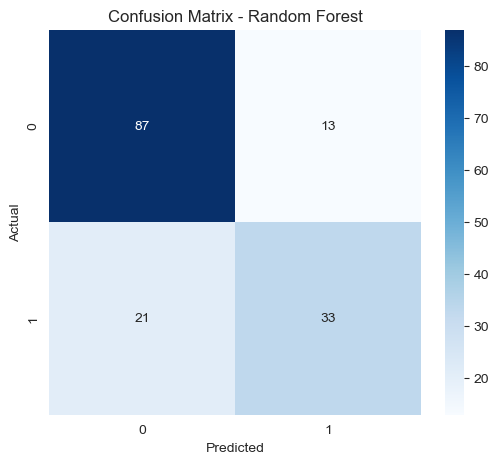

In [76]:
# 11) Confusion Matrix Plot (Random Forest)
# ==============================
cm = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Random Forest")
plt.show()


In [77]:
# 12) Feature Importance
# ==============================
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("\nFeature Importance:\n", feature_importance)


Feature Importance:
                     Feature  Importance
1                   Glucose    0.274086
5                       BMI    0.161903
6  DiabetesPedigreeFunction    0.125020
7                       Age    0.112985
4                   Insulin    0.091224
2             BloodPressure    0.083518
0               Pregnancies    0.080795
3             SkinThickness    0.070468
